In [1]:
import numpy as np
import pandas as pd
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

/home/jovyan/miniforge3/envs/contextpert/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print('hello')

hello


In [75]:
perttypes = [
    'Ligand knock-in',
    'Overexpression',
    'shRNA knockdown',
    'Small molecule',
]
datafiles = [
    'data/preds/home/user/screening2/contextpert/trt_lig_preds/full_dataset_correlations.npy',
    'data/preds/home/user/screening2/contextpert/trt_oe_preds/full_dataset_correlations.npy',
    'data/preds/home/user/screening2/contextpert/trt_sh_preds/full_dataset_correlations.npy',
    'data/preds/home/user/screening2/contextpert/trt_cp_preds/full_dataset_correlations.npy',
]
metadatafiles = [
    'data/preds/home/user/screening2/contextpert/trt_lig_preds/full_dataset_predictions.csv',
    'data/preds/home/user/screening2/contextpert/trt_oe_preds/full_dataset_predictions.csv',
    'data/preds/home/user/screening2/contextpert/trt_sh_preds/full_dataset_predictions.csv',
    'data/preds/home/user/screening2/contextpert/trt_cp_preds/full_dataset_predictions.csv',
]
datas = []
metadatas = []
for perttype, datafile, metadatafile in zip(perttypes, datafiles, metadatafiles):
    data = np.load(datafile)
    metadata = pd.read_csv(metadatafile)
    metadata['pert_type'] = perttype
    datas.append(data)
    metadatas.append(metadata)
data = np.concatenate(datas, axis=0)
metadata = pd.concat(metadatas, axis=0).reset_index(drop=True)

In [76]:
data.shape

(623466, 50, 50)

In [77]:
metadata.head()

,split,sample_idx,mse,cell_id,pert_time,pert_dose,inst_id,pert_type,canonical_smiles
0,train,0,0.342085,A375,4,0.03,CYT001_A375_4H_X1_B7_DUO52HI53LO:C03,Ligand knock-in,NaN
1,train,1,0.304618,A375,4,0.03,CYT001_A375_4H_X2_B7_DUO52HI53LO:C03,Ligand knock-in,NaN
2,train,2,0.488953,A375,4,0.03,CYT001_A375_4H_X3_B7_DUO52HI53LO:C03,Ligand knock-in,NaN
3,train,3,0.550112,A375,4,20.00,CYT001_A375_4H_X1_B7_DUO52HI53LO:B04,Ligand knock-in,NaN
4,train,4,0.334897,A375,4,20.00,CYT001_A375_4H_X2_B7_DUO52HI53LO:B04,Ligand knock-in,NaN


In [78]:
data_flat = data.reshape(data.shape[0], -1)
colors = metadata['pert_type']

In [79]:
# Random sample for quicker output
n = 1000
# Sample this many from each pert_type
sampled_indices = []
for perttype in perttypes:
    indices = np.where(metadata['pert_type'] == perttype)[0]
    if len(indices) > n:
        sampled_indices.extend(np.random.choice(indices, n, replace=False))
    else:
        sampled_indices.extend(indices)
sampled_indices = np.array(sampled_indices)
data_flat = data_flat[sampled_indices]
colors = colors.iloc[sampled_indices].reset_index(drop=True)

In [104]:
%%time
# reducer = UMAP(random_state=42, n_neighbors=100, min_dist=0.5, n_components=2)
# embedding = reducer.fit_transform(data_flat)

# Use PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
embedding = pca.fit_transform(data_flat)[:, [3, 1]]

CPU times: user 3.07 s, sys: 2.01 s, total: 5.08 s
Wall time: 363 ms


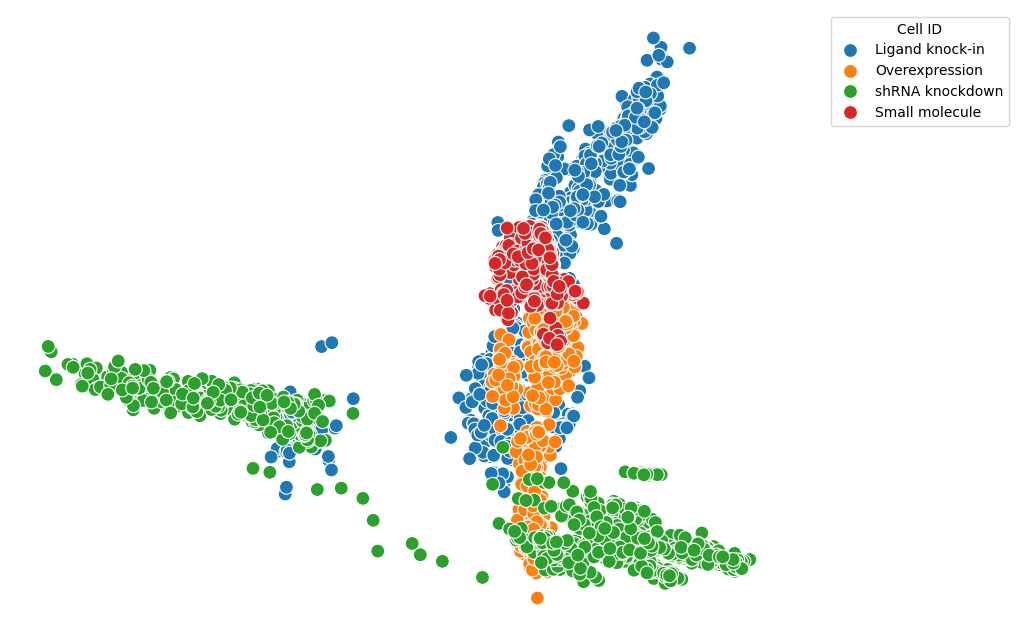

In [105]:
# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=colors, palette='tab10', s=100)
plt.axis('off')
plt.legend(title='Cell ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()